In [1]:
import gym

#Import game
import gym_super_mario_bros

#Import Joypad
from nes_py.wrappers import JoypadSpace

#Import Controls
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

#FrameStacking e GreyScaling
from gym.wrappers import GrayScaleObservation

#Vectorization
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv

#Graphs
from matplotlib import pyplot as plt

import os

#Proximal Policy Optimization
from stable_baselines3 import PPO
from stable_baselines3 import DQN

#To save models
from stable_baselines3.common.callbacks import BaseCallback

In [2]:
# [1] - Setup base environment
env = gym_super_mario_bros.make("SuperMarioBros-v0", render_mode='human', apply_api_compatibility=True)
#256 possible actions
print(env.action_space)

# [2] - Simplify the controls, with wrapping the model will have only 7 possible actions
env = JoypadSpace(env, SIMPLE_MOVEMENT)
print(env.action_space)

# [3] - Grayscale
env = GrayScaleObservation(env, keep_dim=True)

# [4] - Wrap inside a dummy envorinment
env = DummyVecEnv([lambda: env])

# [5] - Stack four frames
env = VecFrameStack(env, 4, channels_order='last')

#JoypadSpace doesn't correctly override the reset() method of Wrapper.
JoypadSpace.reset = lambda self, **kwargs: self.env.reset(**kwargs)

c:\Users\Taba\Desktop\Super Mario\mlenv\Lib\site-packages\gym\envs\registration.py:555: UserWarning: WARN: The environment SuperMarioBros-v0 is out of date. You should consider upgrading to version `v3`.
  logger.warn(
c:\Users\Taba\Desktop\Super Mario\mlenv\Lib\site-packages\gym\envs\registration.py:627: UserWarning: WARN: The environment creator metadata doesn't include `render_modes`, contains: ['render.modes', 'video.frames_per_second']
  logger.warn(


Discrete(256)
Discrete(7)


c:\Users\Taba\Desktop\Super Mario\mlenv\Lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


# Test Model

In [3]:
##Hyperparametri
trajectory = 4096
iterations = 10

experiments = trajectory * iterations

In [4]:
#Functions
def get_max_x(infos):

    max_x = 0

    for i in range(0,len(infos)):
        x = infos[i][0]['x_pos']
        if infos[i][0]['world'] == 1 and x > max_x and x < 60000:
            max_x = x

    return max_x

def get_reward(rewards, iterations):

    r =  sum(rewards) / iterations

    return r

In [5]:
i = 100000
list_rewards = []
list_max_x = []

for i in range(i,2100000,100000):
    filename = "best_model_" + str(i) + ".zip"
    print("Opnening " + filename)

    model = DQN.load('./train/'+ filename)

    rewards = []
    infos = []
    steps = 0

    #Game starting
    state = env.reset()

    while steps < experiments:

        action, _state = model.predict(state)
        
        state, reward, done, info = env.step(action)

        rewards.append(reward)
        infos.append(info)
        
        steps = steps + 1

        env.render()


    list_rewards.append(get_reward(rewards,iterations))
    list_max_x.append(get_max_x(infos))

    del model

Opnening best_model_100000.zip


c:\Users\Taba\Desktop\Super Mario\mlenv\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
c:\Users\Taba\Desktop\Super Mario\mlenv\Lib\site-packages\gym\utils\passive_env_checker.py:272: UserWarning: WARN: No render modes was declared in the environment (env.metadata['render_modes'] is None or not defined), you may have trouble when calling `.render()`.
  logger.warn(


Opnening best_model_200000.zip
Opnening best_model_300000.zip
Opnening best_model_400000.zip
Opnening best_model_500000.zip
Opnening best_model_600000.zip
Opnening best_model_700000.zip
Opnening best_model_800000.zip
Opnening best_model_900000.zip
Opnening best_model_1000000.zip
Opnening best_model_1100000.zip
Opnening best_model_1200000.zip
Opnening best_model_1300000.zip
Opnening best_model_1400000.zip
Opnening best_model_1500000.zip
Opnening best_model_1600000.zip
Opnening best_model_1700000.zip
Opnening best_model_1800000.zip
Opnening best_model_1900000.zip
Opnening best_model_2000000.zip


In [6]:
list_max_x

[723,
 725,
 1501,
 1220,
 1154,
 1128,
 1456,
 1392,
 1404,
 1732,
 2228,
 1434,
 2227,
 1135,
 1534,
 1512,
 255,
 255,
 1129,
 899]

In [7]:
list_rewards

[array([280.2], dtype=float32),
 array([281.4], dtype=float32),
 array([1858.6], dtype=float32),
 array([301.], dtype=float32),
 array([1088.3], dtype=float32),
 array([689.8], dtype=float32),
 array([1098.9], dtype=float32),
 array([1221.6], dtype=float32),
 array([1926.1], dtype=float32),
 array([1136.5], dtype=float32),
 array([2661.4], dtype=float32),
 array([1396.7], dtype=float32),
 array([1384.8], dtype=float32),
 array([767.], dtype=float32),
 array([2944.4], dtype=float32),
 array([1266.1], dtype=float32),
 array([-237.9], dtype=float32),
 array([-237.1], dtype=float32),
 array([796.8], dtype=float32),
 array([950.6], dtype=float32)]

(500.0, 3500.0)

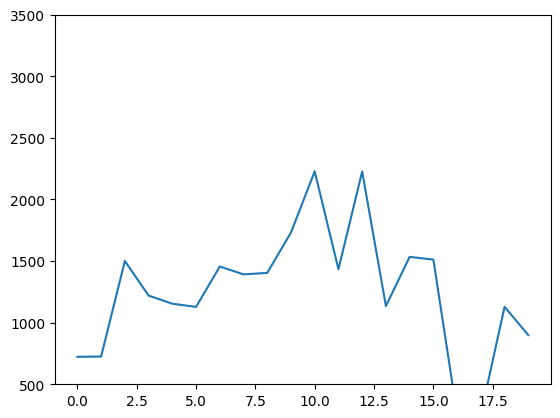

In [10]:
plt.plot(list_max_x)
plt.ylim(500, 3500)

(-500.0, 7300.0)

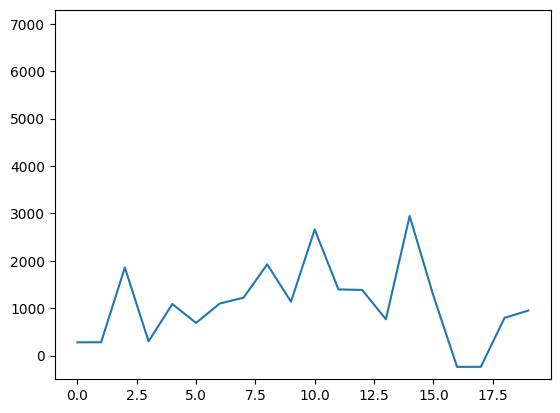

: 

In [14]:
plt.plot(list_rewards)
plt.ylim(-500, 7300)